Imports

In [265]:
import numpy as np
import matplotlib.pyplot as plt

todo: initialise constants from the dataset (drop name column)
todo: redefine feed forward generally
todo: do todo 

Intialise network architecture

In [266]:
hidden_layers = 3  # number of layers(excluding input layer)
features = 2  # number of features
outputs = 1  # number of output nodes

In [267]:
def init_network(input_size=features, hidden_size=features+1, output_size=outputs, num_hidden_layers=hidden_layers):
    weights = []
    biases = []
    
    alpha = 1  # scaling factor for weights
    beta = 1   # scaling factor for biases

    # Input to first hidden layer
    weights.append(np.random.randn(hidden_size, input_size) * alpha)
    biases.append(np.random.randn(hidden_size, 1) * beta)
    
    # Hidden layers
    for i in range(num_hidden_layers - 1):
        weights.append(np.random.randn(hidden_size, hidden_size) * alpha)
        biases.append(np.random.randn(hidden_size, 1) * beta)
    
    # Last hidden to output layer
    weights.append(np.random.randn(output_size, hidden_size) * alpha)
    biases.append(np.random.randn(output_size, 1) * beta)
    
    return weights, biases

In [268]:
weights, biases = init_network()
print("Weights of the network:", weights)
print("Biases of the network:", biases)

Weights of the network: [array([[-1.89336   ,  0.64619733],
       [-1.33898383,  1.20412845],
       [-0.2376183 ,  1.51236453]]), array([[-0.27422178, -0.1935497 , -0.13485304],
       [ 0.25646856,  0.5576272 ,  0.77711924],
       [ 1.07550293,  0.38680943, -0.31482722]]), array([[-1.05463389,  0.49712332,  1.44342212],
       [ 2.64014531, -1.13980828, -0.27226802],
       [ 2.73430521,  0.52345338, -0.42667464]]), array([[ 0.66627921,  0.92074982, -0.97999566]])]
Biases of the network: [array([[-0.50952926],
       [-0.43271379],
       [ 1.05800238]]), array([[ 0.79880513],
       [-0.99238038],
       [ 0.19674909]]), array([[-0.01904788],
       [-0.86481365],
       [ 1.54021066]]), array([[-0.36104062]])]


Training data

In [269]:
def prepare_data():
  X = np.array([
      [150, 70],
      [254, 73],
      [312, 68],
      [120, 60],
      [154, 61],
      [212, 65],
      [216, 67],
      [145, 67],
      [184, 64],
      [130, 69]
  ])
  y = np.array([0,1,1,0,0,1,1,0,1,0])
  m = y.shape[0]  # number of samples
  
  # Normalize the input features to prevent gradient issues
  mean = np.mean(X, axis=0)
  std = np.std(X, axis=0)
  X = (X - mean) / std
  # Transpose the input matrix to match the expected shape
  A0 = X.T
  # Reshape y to a matrix
  Y = y.reshape(outputs, m)

  return A0, Y, mean, std

In [270]:
x_train, y_train, mean, std = prepare_data()

Activation function sigmoid 
$$g(z)=\frac{1}{(1+e^{-z})}$$

In [271]:
# Sigmoid activation function
def sigmoid(arr):
    return 1 / (1+np.exp(-1*arr))

Feed forward

In [272]:
def feed_forward(input_layer=x_train, num_hidden_layers=hidden_layers, weights=weights, biases=biases):
  cache = [input_layer]
  
  for i in range(0,num_hidden_layers+1):
    prev_layer = cache[i]
    W = weights[i]
    b = biases[i]
    Z = W @ prev_layer + b
    A = sigmoid(Z)
    cache.append(A)

  return cache


In [273]:
cache = feed_forward(x_train)  # Get the output layer predictions
predictions = cache[-1]  # Last layer output
print("Predictions of the network:", cache[-1])
print("\nPredictions:", cache)

Predictions of the network: [[0.39170576 0.39235328 0.39754905 0.40603143 0.40540055 0.39996956
  0.39704212 0.39460844 0.4011572  0.39183185]]

Predictions: [array([[-0.65092849,  1.1447363 ,  2.14616475, -1.16890872, -0.58186446,
         0.41956398,  0.48862802, -0.73725852, -0.06388423, -0.99624864],
       [ 0.94736842,  1.73684211,  0.42105263, -1.68421053, -1.42105263,
        -0.36842105,  0.15789474,  0.15789474, -0.63157895,  0.68421053]]), array([[0.79168293, 0.17442512, 0.01337492, 0.64914963, 0.41918236,
        0.17624652, 0.20872188, 0.72877132, 0.31073228, 0.86042965],
       [0.82915101, 0.53142946, 0.05735703, 0.28996177, 0.20347156,
        0.19183518, 0.28969758, 0.67799853, 0.2483044 , 0.84878771],
       [0.93372946, 0.96810003, 0.76581324, 0.2294563 , 0.27830488,
        0.59895657, 0.76507181, 0.81335859, 0.52946703, 0.91129133]]), array([[0.57329567, 0.62657814, 0.66390914, 0.63035248, 0.64724339,
        0.65307282, 0.64160242, 0.58856828, 0.64431359, 0.568487

Use loss as cost function: $L\left(\hat{y}_i y_i\right)=-\left(y_i \ln \hat{y}_i+\left(1-y_i\right) \ln \left(1-\hat{y}_i\right)\right)$


Hence cost given by: $C=\frac{1}{m} \sum_{i=1}^m L\left(\hat{y}_i, y_i\right)$

In [274]:
def cost(y_hat=predictions, y=y_train):
  """
  y_hat should be a n^L x m matrix
  y should be a n^L x m matrix
  """

  # Clip predictions to avoid log(0)
  y_hat = np.clip(y_hat, 1e-15, 1 - 1e-15)

  # 1. losses is a n^L x m
  losses = - ( (y * np.log(y_hat)) + (1 - y)*np.log(1 - y_hat) )

  return np.mean(losses)

In [275]:
print(cost(predictions, y_train))

0.7148587646948606


Backpropagation with formulas derived using calculus

In [276]:
def backprop_layer(dC_dA_current, A_current, A_prev, W_current, Y, layer_num):
    """
    Backpropagation for a single layer.

    Args:
        dC_dA_current:  Propagator from the next layer (dC/dA[l+1]). For the output layer, this is None.
        A_current:      Activations of the current layer (A[l])
        A_prev:         Activations of the previous layer (A[l-1])
        W_current:      Weights of the current layer (W[l])
        Y:              True labels (only needed for the output layer)

    Returns:
        dC_dW: Gradient of cost with respect to weights
        dC_db: Gradient of cost with respect to biases
        dC_dA_prev: Propagator to the previous layer (dC/dA[l-1])
    """

    # Calculate dC/dZ
    if dC_dA_current is None:  # Output layer
        dC_dZ = (A_current - Y) / A_current.shape[0]  # Average over the number of samples
    else:  # Hidden layer
        dA_dZ = A_current * (1 - A_current)
        dC_dZ = dC_dA_current * dA_dZ


    # calculate dC/dW
    dZ_dW = A_prev
    dC_dW = dC_dZ @ dZ_dW.T

    # step 3. calculate dC/db
    dC_db = np.sum(dC_dZ, axis=1, keepdims=True)

    # calculate propagator to the prev layer
    if layer_num != 0:  # Not the input layer
        dZ_dA_prev = W_current
        dC_dA_prev = W_current.T @ dC_dZ

    else:
        dC_dA_prev = None

    return dC_dW, dC_db, dC_dA_prev

Train

In [277]:
def train(epochs=400, alpha=0.1, hidden_layers=hidden_layers, features=features, outputs=outputs):
  global weights, biases, x_train, y_train
  
  costs = []
  num_layers = hidden_layers + 1

  for e in range(epochs):
    # Feed forward
    cache = feed_forward(x_train)
    predictions = cache[-1]
    
    # Cost
    costs.append(cost(predictions, y_train))

    # Backpropagation 
    dC_dA_prev = None
    updates = []
    for layer_num in range(num_layers, 0, -1):
        
        A_current = cache[layer_num]
        A_prev = cache[layer_num-1]
        W_current = weights[layer_num-1]

        dC_dW, dC_db, dC_dA_prev_new = backprop_layer(
            dC_dA_current=dC_dA_prev, 
            A_current=A_current, 
            A_prev=A_prev, 
            W_current=W_current, 
            Y=y_train,
            layer_num=layer_num
        )
        dC_dA_prev = dC_dA_prev_new
        updates.insert(0, (dC_dW, dC_db))


    # Update weights and biases
    for layer_num in range(num_layers):
        dC_dW, dC_db = updates[layer_num]

        # Update weights and biases
        weights[layer_num] -= alpha * dC_dW
        biases[layer_num] -= alpha * dC_db


    if e % 20 == 0:
      print(f"epoch {e}: cost = {costs[e]:4f}")
  
  return costs

In [278]:
for i in range(10,1,-1):
  print(i)

10
9
8
7
6
5
4
3
2


epoch 0: cost = 0.714859
epoch 20: cost = 0.663194
epoch 40: cost = 0.557565
epoch 60: cost = 0.318848
epoch 80: cost = 0.160898
epoch 100: cost = 0.091909
epoch 120: cost = 0.059839
epoch 140: cost = 0.042855
epoch 160: cost = 0.032777
epoch 180: cost = 0.026257
epoch 200: cost = 0.021755
epoch 220: cost = 0.018489
epoch 240: cost = 0.016026
epoch 260: cost = 0.014110
epoch 280: cost = 0.012582
epoch 300: cost = 0.011338
epoch 320: cost = 0.010308
epoch 340: cost = 0.009441
epoch 360: cost = 0.008703
epoch 380: cost = 0.008068


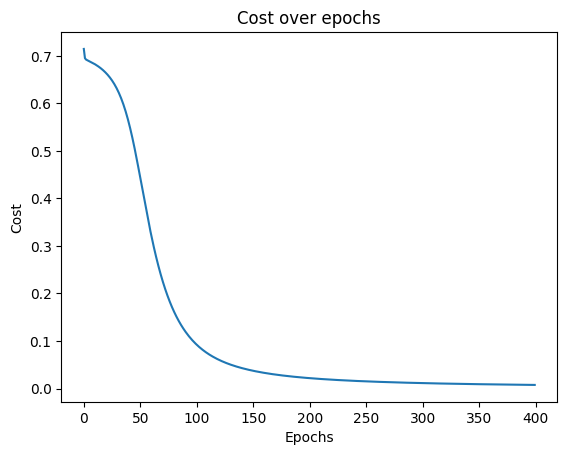

In [279]:
costs = train()
plt.plot(costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost over epochs')
plt.show()

In [280]:
def accuracy(x_test, y_test):
    """
    Calculate the accuracy of the predictions.
    
    Args:
        predictions: Predicted values from the network.
        y: True labels
        
    Returns:
        Accuracy as a percentage
    """
    correct_predictions = np.sum(np.round(predictions) == y)
    total_samples = y.shape[1]
    
    return (correct_predictions / total_samples) * 100

In [284]:
test = np.array([200, 70]) - mean
test = test / std
print(f"Prediction for {test}:", np.round(feed_forward(test.T)[-1]))

Prediction for [0.21237189 0.94736842]: [[1. 1. 0.]]
